In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns 
%matplotlib inline

warnings.filterwarnings("ignore")


/var/folders/wc/dg5vr0h57jvg48dksgcxz02w0000gn/T/ipykernel_11228/2382741890.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/processed/missing-imputed.csv")
df.head(5)

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,the lions cghs,flat,sector 56,1.99,11055.0,4,4,3+,6.0,old property,2000.0,0,1,0,0,1,2,92
1,bestech park view residency,flat,sector 2,0.98,6261.0,2,2,3,12.0,moderately new,1416.0,0,0,0,1,0,0,75
2,bptp freedom park life,flat,sector 57,5.50,8982.0,5,6,3+,6.0,moderately new,5010.0,1,1,0,0,0,2,120
3,ss the leaf,flat,sector 85,1.25,7179.0,2,2,3,8.0,relatively new,1730.0,0,0,0,0,0,0,35
4,vatika city homes,flat,sector 83,1.05,8571.0,3,3,3,10.0,moderately new,1468.0,0,1,0,0,0,2,81


In [3]:
df.drop(columns=["society", "price_per_sqft"], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     3548 non-null   object 
 1   sector            3548 non-null   object 
 2   price             3548 non-null   float64
 3   bedRoom           3548 non-null   int64  
 4   bathroom          3548 non-null   int64  
 5   balcony           3548 non-null   object 
 6   floorNum          3548 non-null   float64
 7   agePossession     3548 non-null   object 
 8   built_up_area     3548 non-null   float64
 9   servant room      3548 non-null   int64  
 10  pooja room        3548 non-null   int64  
 11  store room        3548 non-null   int64  
 12  study room        3548 non-null   int64  
 13  others            3548 non-null   int64  
 14  furniture_labels  3548 non-null   int64  
 15  luxury_score      3548 non-null   int64  
dtypes: float64(3), int64(9), object(4)
memory 

In [5]:
df.isnull().sum()

property_type       0
sector              0
price               0
bedRoom             0
bathroom            0
balcony             0
floorNum            0
agePossession       0
built_up_area       0
servant room        0
pooja room          0
store room          0
study room          0
others              0
furniture_labels    0
luxury_score        0
dtype: int64

In [6]:
numerical = df.select_dtypes(exclude="object").columns
categorical = df.select_dtypes(include="object").columns

<Axes: >

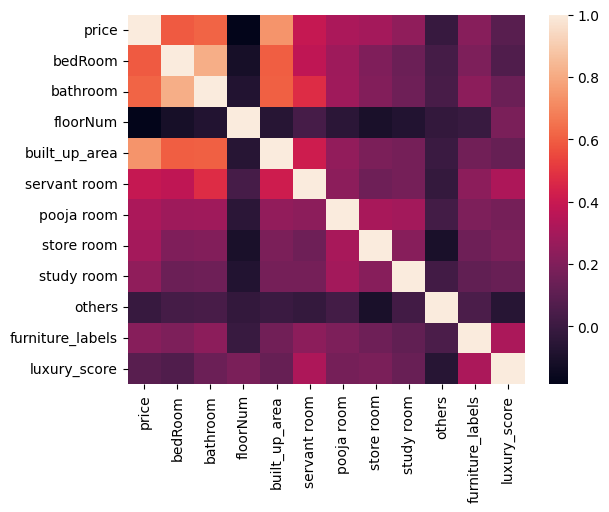

In [7]:
sns.heatmap(df[numerical].corr())

In [8]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
0,flat,sector 56,1.99,4,4,3+,6.0,old property,2000.0,0,1,0,0,1,2,92
1,flat,sector 2,0.98,2,2,3,12.0,moderately new,1416.0,0,0,0,1,0,0,75
2,flat,sector 57,5.50,5,6,3+,6.0,moderately new,5010.0,1,1,0,0,0,2,120
3,flat,sector 85,1.25,2,2,3,8.0,relatively new,1730.0,0,0,0,0,0,0,35
4,flat,sector 83,1.05,3,3,3,10.0,moderately new,1468.0,0,1,0,0,0,2,81


In [9]:
# LETS SEE CORRELATION WITH TARGET COLUMN PRICE
df[numerical].corr()["price"].sort_values(ascending=False)

price               1.000000
built_up_area       0.737750
bathroom            0.611163
bedRoom             0.591262
servant room        0.390883
pooja room          0.319134
store room          0.300495
study room          0.242008
furniture_labels    0.218451
luxury_score        0.086085
others             -0.012423
floorNum           -0.185460
Name: price, dtype: float64

Now lets encode our Luxury score column and floor num column into a meaningful category

<Axes: >

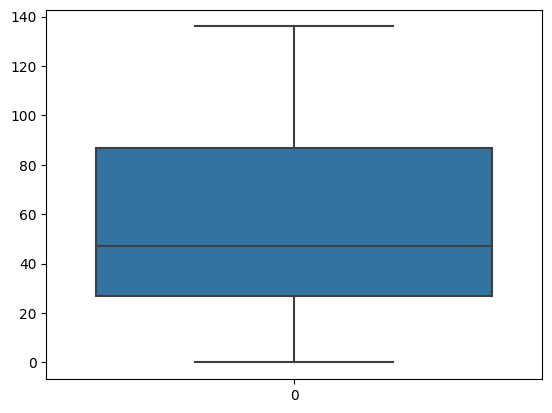

In [10]:
sns.boxplot(df["luxury_score"])

In [11]:
# ENCODING LUXURY SCORE COLUMN
def luxury(row):
    if 0 <= row < 50:
        return "Low"
    elif 50 <= row < 120:
        return "Medium"
    elif 120 <= row:
        return "High"
    else:
        return None
            
df["luxury_level"] = df["luxury_score"].apply(luxury)

In [12]:
df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,luxury_level
3362,flat,sector 65,2.33,2,2,3,6.0,under construction,1141.0,0,0,0,0,0,2,35,Low
2280,flat,sector 95,0.30,2,2,1,2.0,relatively new,950.0,0,0,0,0,0,0,0,Low
2517,flat,sector 70,1.80,3,5,3,8.0,new property,2167.0,0,0,0,0,0,0,50,Medium
3067,house,sector 45,8.50,5,4,2,1.0,moderately new,3240.0,1,1,0,0,0,2,35,Low
883,house,sector 50,10.45,5,7,3+,3.0,moderately new,3240.0,1,1,0,1,1,2,122,High


<Axes: >

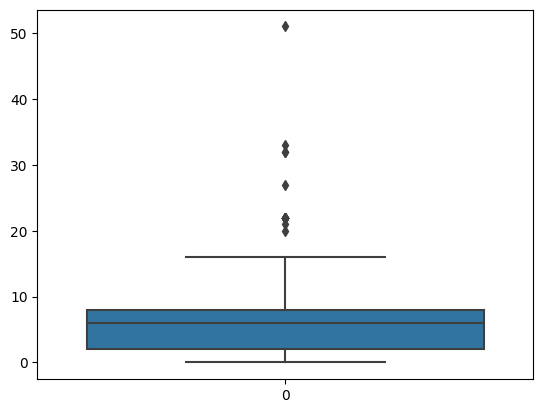

In [13]:
# ENCODING FLOOR NUM COUMN
sns.boxplot(df["floorNum"])

In [14]:
def floor(row):
    if 0 <= row <= 2:
        return "Low Floor"
    elif 3 <= row <= 10:
        return "Mid Floor"
    elif 11 <= row <= 51:
        return "High Floor"
    else:
        return None
    
df["floor_category"] = df["floorNum"].apply(floor)

In [15]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,luxury_level,floor_category
0,flat,sector 56,1.99,4,4,3+,6.0,old property,2000.0,0,1,0,0,1,2,92,Medium,Mid Floor
1,flat,sector 2,0.98,2,2,3,12.0,moderately new,1416.0,0,0,0,1,0,0,75,Medium,High Floor
2,flat,sector 57,5.50,5,6,3+,6.0,moderately new,5010.0,1,1,0,0,0,2,120,High,Mid Floor
3,flat,sector 85,1.25,2,2,3,8.0,relatively new,1730.0,0,0,0,0,0,0,35,Low,Mid Floor
4,flat,sector 83,1.05,3,3,3,10.0,moderately new,1468.0,0,1,0,0,0,2,81,Medium,Mid Floor


In [16]:
print(f"Before dropping {df.shape}")
df.drop(columns=["floorNum", "luxury_score"], inplace=True)
print(f"After dropping {df.shape}")

Before dropping (3548, 18)
After dropping (3548, 16)


In [17]:
data = df.copy()

In [18]:
data.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_level,floor_category
0,flat,sector 56,1.99,4,4,3+,old property,2000.0,0,1,0,0,1,2,Medium,Mid Floor
1,flat,sector 2,0.98,2,2,3,moderately new,1416.0,0,0,0,1,0,0,Medium,High Floor
2,flat,sector 57,5.50,5,6,3+,moderately new,5010.0,1,1,0,0,0,2,High,Mid Floor
3,flat,sector 85,1.25,2,2,3,relatively new,1730.0,0,0,0,0,0,0,Low,Mid Floor
4,flat,sector 83,1.05,3,3,3,moderately new,1468.0,0,1,0,0,0,2,Medium,Mid Floor


In [19]:
# USING ORDINAL ENCODER TO ENCODE CATEGORICAL VARIABLES

from sklearn.preprocessing import OrdinalEncoder

categorical_col = data.select_dtypes(include="object").columns

for column in categorical_col:
    oe = OrdinalEncoder()
    data[column] = oe.fit_transform(data[[column]])
    

# SPLIT INTO X_label AND Y_label
X_label = data.drop(columns="price")
Y_label = data["price"]   

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_level,floor_category
0,0.0,63.0,4,4,4.0,2.0,2000.00,0,1,0,0,1,2,2.0,2.0
1,0.0,25.0,2,2,3.0,0.0,1416.00,0,0,0,1,0,0,2.0,0.0
2,0.0,64.0,5,6,4.0,0.0,5010.00,1,1,0,0,0,2,0.0,2.0
3,0.0,97.0,2,2,3.0,3.0,1730.00,0,0,0,0,0,0,1.0,2.0
4,0.0,95.0,3,3,3.0,0.0,1468.00,0,1,0,0,0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.0,4.0,3,3,3.0,3.0,1315.00,1,0,0,0,0,0,2.0,2.0
3544,0.0,71.0,4,4,5.0,3.0,3950.00,0,0,0,0,0,0,2.0,2.0
3545,0.0,73.0,4,4,3.0,3.0,1650.07,0,0,0,1,0,2,2.0,1.0
3546,0.0,92.0,2,2,1.0,3.0,613.00,0,0,0,0,0,2,2.0,2.0


We will use different Feature seelection techniques to calculate the feature importances and then at the end take an avergae from all these techniques for each feature.

1. CORRELATION ANALYSIS

<Axes: >

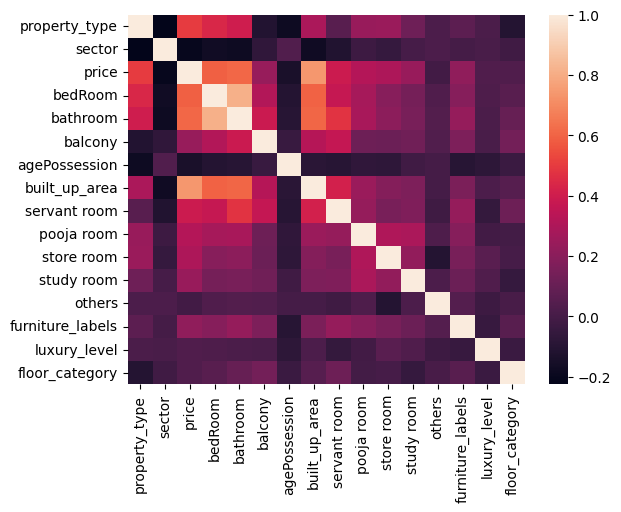

In [21]:
sns.heatmap(data.corr())

In [22]:
# LETS FIND THE CORREALTION WITH THE TARGET COLUMN PRICE
corr_df = data.corr()["price"].iloc[1:].to_frame().reset_index().rename(columns={"index":"features", "price":"corr_coeff"})
corr_df

,features,corr_coeff
0,sector,-0.203316
1,price,1.000000
2,bedRoom,0.591262
3,bathroom,0.611163
4,balcony,0.236616
5,agePossession,-0.138904
6,built_up_area,0.737750
7,servant room,0.390883
8,pooja room,0.319134
9,store room,0.300495


2. RANDOM FOREST FEATURE IMPORTANCE

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_label, Y_label)

fi_rf = pd.DataFrame({
    "features":X_label.columns,
    "rf_importance":rf.feature_importances_
}).sort_values('rf_importance', ascending=False)


fi_rf

,features,rf_importance
6,built_up_area,0.650732
1,sector,0.105431
0,property_type,0.102098
2,bedRoom,0.025059
3,bathroom,0.024529
7,servant room,0.021378
4,balcony,0.014196
5,agePossession,0.011361
10,study room,0.009343
13,luxury_level,0.007717


3. GRADIENT BOOSTING FEATURE IMPORTANCES

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_label, Y_label)

fi_gbr = pd.DataFrame({
    "features":X_label.columns,
    "gbr_importance":gbr.feature_importances_
}).sort_values("gbr_importance", ascending=False)

fi_gbr

,features,gbr_importance
6,built_up_area,0.678503
1,sector,0.102643
0,property_type,0.097825
3,bathroom,0.036398
2,bedRoom,0.034611
7,servant room,0.027987
9,store room,0.007456
13,luxury_level,0.004212
5,agePossession,0.003650
10,study room,0.003480


4. PERMUTATION IMPORTANCE

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_label, Y_label, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# CALCULATING PERMUTATION IMPORTANCE
permutation_imp = permutation_importance(rfr, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1)

fi_pi = pd.DataFrame({
    "features":X_label.columns,
    "pi_importance":permutation_imp.importances_mean
}).sort_values("pi_importance", ascending=False)

fi_pi

,features,pi_importance
6,built_up_area,0.686993
0,property_type,0.201929
1,sector,0.110679
7,servant room,0.007841
9,store room,0.004808
4,balcony,0.004469
3,bathroom,0.003030
10,study room,0.002709
14,floor_category,0.001781
11,others,0.001094


5. LASSO REGRESSION

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, Y_label)


fi_ls = pd.DataFrame({
    'features': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_ls

,features,lasso_coeff
6,built_up_area,1.443266
0,property_type,0.706939
3,bathroom,0.285139
9,store room,0.196895
10,study room,0.178596
7,servant room,0.165940
12,furniture_labels,0.133094
8,pooja room,0.079315
2,bedRoom,0.038953
14,floor_category,0.032839


6.RFE

In [27]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor(n_estimators=100, random_state=42)

rfe = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
label = rfe.fit(X_label, Y_label)

selected_features = X_label.columns[label.support_]
selected_coeff = label.estimator_.feature_importances_

fi_rfe = pd.DataFrame({
    "features":X_label.columns,
    "rfe_importance":selected_coeff
}).sort_values("rfe_importance", ascending=False)

fi_rfe

,features,rfe_importance
6,built_up_area,0.650732
1,sector,0.105431
0,property_type,0.102098
2,bedRoom,0.025059
3,bathroom,0.024529
7,servant room,0.021378
4,balcony,0.014196
5,agePossession,0.011361
10,study room,0.009343
13,luxury_level,0.007717


In [28]:
final_df = corr_df.merge(fi_rf, on="features").merge(fi_gbr, on="features").merge(fi_pi, on="features").merge(fi_ls, on="features").merge(fi_rfe, on="features")
final_df

,features,corr_coeff,rf_importance,gbr_importance,pi_importance,lasso_coeff,rfe_importance
0,sector,-0.203316,0.105431,0.102643,0.110679,-0.054996,0.105431
1,bedRoom,0.591262,0.025059,0.034611,-0.000130,0.038953,0.025059
2,bathroom,0.611163,0.024529,0.036398,0.003030,0.285139,0.024529
3,balcony,0.236616,0.014196,0.001325,0.004469,0.000000,0.014196
4,agePossession,-0.138904,0.011361,0.003650,-0.000541,-0.032428,0.011361
5,built_up_area,0.737750,0.650732,0.678503,0.686993,1.443266,0.650732
6,servant room,0.390883,0.021378,0.027987,0.007841,0.165940,0.021378
7,pooja room,0.319134,0.004978,0.000064,-0.001055,0.079315,0.004978
8,store room,0.300495,0.007380,0.007456,0.004808,0.196895,0.007380
9,study room,0.242008,0.009343,0.003480,0.002709,0.178596,0.009343


In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax.set_output(transform="pandas")
scaled = minmax.fit_transform(final_df.iloc[:, 1:])

scaled.insert(column="features", loc=0, value=(final_df["features"]))


# CREATING NEW DATAFRAME FOR MEAN IMPORTANCE OF FEATURES
mimmax_scaled = pd.DataFrame({
    "features":scaled.features
})

mimmax_scaled["mean_importance"] = scaled.iloc[:, 1:].mean(axis=1)
mimmax_scaled = mimmax_scaled.sort_values("mean_importance", ascending=False)

mimmax_scaled

,features,mean_importance
5,built_up_area,1.000000
2,bathroom,0.203607
1,bedRoom,0.171768
6,servant room,0.148808
8,store room,0.123263
9,study room,0.110396
7,pooja room,0.109017
0,sector,0.105421
11,furniture_labels,0.098073
3,balcony,0.091967


In [30]:
# RUNNING A BASELINE MODEL TO CHECK THE PERFORMANCE ALL CURRENT FEATURES
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
basemodel = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1)

score = cross_val_score(basemodel, X_label, Y_label, cv=5, scoring="r2")

print(f"The r2 score is: {score.mean()}")

The r2 score is: 0.8098723812456182


In [31]:
# LETS CHECK IF MY ELIMINATING SOME LOWER IMPORTANCE FEATURES IS THERE ANY CHANGE IN SCORE
test_df = X_label.copy()
test_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_level,floor_category
0,0.0,63.0,4,4,4.0,2.0,2000.00,0,1,0,0,1,2,2.0,2.0
1,0.0,25.0,2,2,3.0,0.0,1416.00,0,0,0,1,0,0,2.0,0.0
2,0.0,64.0,5,6,4.0,0.0,5010.00,1,1,0,0,0,2,0.0,2.0
3,0.0,97.0,2,2,3.0,3.0,1730.00,0,0,0,0,0,0,1.0,2.0
4,0.0,95.0,3,3,3.0,0.0,1468.00,0,1,0,0,0,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.0,4.0,3,3,3.0,3.0,1315.00,1,0,0,0,0,0,2.0,2.0
3544,0.0,71.0,4,4,5.0,3.0,3950.00,0,0,0,0,0,0,2.0,2.0
3545,0.0,73.0,4,4,3.0,3.0,1650.07,0,0,0,1,0,2,2.0,1.0
3546,0.0,92.0,2,2,1.0,3.0,613.00,0,0,0,0,0,2,2.0,2.0


In [32]:
print(f"Before dropping {test_df.shape}")
test_df.drop(columns=["agePossession", "others"], inplace=True)
print(f"After dropping {test_df.shape}")

Before dropping (3548, 15)
After dropping (3548, 13)


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
basemodel = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1)

score = cross_val_score(basemodel, test_df, Y_label, cv=5, scoring="r2")

print(f"The r2 score is: {score.mean()}")

The r2 score is: 0.812722963964817


There is a slight increase in the score by eliminating least important features.

In [34]:
export_df = test_df
export_df["price"] = Y_label

In [35]:
export_df.shape

(3548, 14)

In [36]:
df.drop(columns=['pooja room', 'study room', 'others'], inplace=True)

from pathlib import Path 

curr_dir = Path("/Users/siddhant/housepriceproject/Capstone/notebooks/feature-selection-engineering.ipynb")
home_dir = curr_dir.parent.parent.parent
destination_dir = home_dir / 'Capstone' / 'data' / 'processed'

destination_dir.mkdir(parents=True, exist_ok=True)

filename = "properties-post-feature-selection.csv"
filepath = destination_dir / filename

df.to_csv(filepath, index=False)